# Approach al dataset

In [ ]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ruta = "/content/drive/MyDrive/Colab Notebooks/Big Data/supermercados.csv"
data = pd.read_csv(ruta)

In [ ]:
print(data.shape)
data.head()

(5640129, 18)


,Unnamed: 0,Tienda,CodCliente,NombreCliente,Categoria,Subcategoria,codigosap,descripcion,fecha,Cantidad,UnidadMedida,PesoNeto,PrecioUnitario,PorcDescuento,ImporteLinea,ImpDescuento,ImporteLineaBs,CostoUnitario
0,0,K015,3546436,CAREAGA CHIRE RAMIRO ALEJANDRO,SALUD SEXUAL,PRESERVATIVOS,10105823.0,PRESERVATIVO MAXMEN BOOM 3UN,2021-07-04,1.0,UN,1,12.9,0.0,12.9,0.0,12.9,8.4943
1,1,K015,647917,TORREZ LUNARIO AMMY,PAPELES DESECHABLES,SERVILLETAS,10065383.0,SERVILLETA ELITE COCTEL 400UN,2021-07-04,1.0,UN,1,29.9,0.0,29.9,0.0,29.9,23.3678
2,2,K015,647917,TORREZ LUNARIO AMMY,BEBIDAS LACTEAS,YOGURT NATURAL/GRIEG,107313.0,YOGURT FATYH NATURAL 500 ML,2021-07-04,1.0,UN,1,8.9,0.0,8.9,0.0,8.9,7.1264
3,3,K015,647917,TORREZ LUNARIO AMMY,AZUCAR,AZUCAR MORENA,10109269.0,AZUCAR AGUAI MORENA 1 KG,2021-07-04,1.0,UN,1,5.5,0.0,5.5,0.0,5.5,4.4483
4,4,K015,647917,TORREZ LUNARIO AMMY,AZUCAR,AZUCAR BLANCA,10004437.0,AZUCAR GUABIRA EXTRA FINA 5KG,2021-07-04,1.0,UN,1,25.5,0.0,25.5,0.0,25.5,18.4713


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5640129 entries, 0 to 5640128
Data columns (total 18 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   Tienda          object 
 2   CodCliente      int64  
 3   NombreCliente   object 
 4   Categoria       object 
 5   Subcategoria    object 
 6   codigosap       float64
 7   descripcion     object 
 8   fecha           object 
 9   Cantidad        float64
 10  UnidadMedida    object 
 11  PesoNeto        int64  
 12  PrecioUnitario  float64
 13  PorcDescuento   float64
 14  ImporteLinea    float64
 15  ImpDescuento    float64
 16  ImporteLineaBs  float64
 17  CostoUnitario   float64
dtypes: float64(8), int64(3), object(7)
memory usage: 774.6+ MB


Convertimos códigoCliente y CódigoSap en categórico

In [ ]:
data['codigosap'] = data['codigosap'].astype(str).str.replace(r'\.0$', '', regex=True)

data['CodCliente'] = data['CodCliente'].astype(str)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5640129 entries, 0 to 5640128
Data columns (total 18 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   Tienda          object 
 2   CodCliente      object 
 3   NombreCliente   object 
 4   Categoria       object 
 5   Subcategoria    object 
 6   codigosap       object 
 7   descripcion     object 
 8   fecha           object 
 9   Cantidad        float64
 10  UnidadMedida    object 
 11  PesoNeto        int64  
 12  PrecioUnitario  float64
 13  PorcDescuento   float64
 14  ImporteLinea    float64
 15  ImpDescuento    float64
 16  ImporteLineaBs  float64
 17  CostoUnitario   float64
dtypes: float64(7), int64(2), object(9)
memory usage: 774.6+ MB


# Limpieza


## Datos faltantes

Eliminamos los campos faltantes

In [ ]:
data.dropna(inplace = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5640082 entries, 0 to 5640128
Data columns (total 18 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   Tienda          object 
 2   CodCliente      object 
 3   NombreCliente   object 
 4   Categoria       object 
 5   Subcategoria    object 
 6   codigosap       object 
 7   descripcion     object 
 8   fecha           object 
 9   Cantidad        float64
 10  UnidadMedida    object 
 11  PesoNeto        int64  
 12  PrecioUnitario  float64
 13  PorcDescuento   float64
 14  ImporteLinea    float64
 15  ImpDescuento    float64
 16  ImporteLineaBs  float64
 17  CostoUnitario   float64
dtypes: float64(7), int64(2), object(9)
memory usage: 817.6+ MB


se eliminaron 46 filas por lo que no hay problema (no es estadisticamente relevante)

## Columnas irrelevantes

Eliminamos la columna unnamed que es básicamente el índice del registro


In [ ]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
for col in data.columns:
  if data[col].dtype == object:
    print(f'Columna {col}: {data[col].nunique()} subniveles')

Columna Tienda: 1 subniveles
Columna CodCliente: 36249 subniveles
Columna NombreCliente: 36131 subniveles
Columna Categoria: 256 subniveles
Columna Subcategoria: 1149 subniveles
Columna codigosap: 26094 subniveles
Columna descripcion: 46306 subniveles
Columna fecha: 730 subniveles
Columna UnidadMedida: 2 subniveles


Se elimina la columna tienda pues es el mismo valor siempre

In [ ]:
data.drop('Tienda', axis = 1, inplace = True)

In [ ]:
data.describe()

,Cantidad,PesoNeto,PrecioUnitario,PorcDescuento,ImporteLinea,ImpDescuento,ImporteLineaBs,CostoUnitario
count,5.640082e+06,5640082.0,5.640082e+06,5.640082e+06,5.640082e+06,5.640082e+06,5.640082e+06,5.640082e+06
mean,1.281415e+00,1.0,2.068438e+01,1.156406e-01,2.078980e+01,1.024883e-01,2.078980e+01,2.148115e+03
std,2.875925e+00,0.0,4.255710e+01,5.587649e-01,4.330226e+01,1.054150e+00,4.330226e+01,2.980603e+04
min,-2.400000e+01,1.0,0.000000e+00,0.000000e+00,-3.349000e+03,0.000000e+00,-3.349000e+03,0.000000e+00
25%,1.000000e+00,1.0,7.900000e+00,0.000000e+00,7.920000e+00,0.000000e+00,7.920000e+00,4.000000e+00
50%,1.000000e+00,1.0,1.350000e+01,0.000000e+00,1.358000e+01,0.000000e+00,1.358000e+01,8.023000e+00
75%,1.000000e+00,1.0,2.370000e+01,0.000000e+00,2.390000e+01,0.000000e+00,2.390000e+01,1.527590e+01
max,2.708000e+03,1.0,2.700000e+04,3.333333e+02,2.700000e+04,1.175880e+03,2.700000e+04,1.069448e+07


Se elimina la columna peso neto al tener desviación estandar 0, lo que indica que tiene un único valor

In [ ]:
data.drop('PesoNeto', axis = 1, inplace = True)

## Duplicados

In [ ]:
duplicates = data[data.duplicated(keep=False)]
duplicates.head(5)


,CodCliente,NombreCliente,Categoria,Subcategoria,codigosap,descripcion,fecha,Cantidad,UnidadMedida,PrecioUnitario,PorcDescuento,ImporteLinea,ImpDescuento,ImporteLineaBs,CostoUnitario
35,0,,BATERIAS,ALCALINAS,10054527,PILAS DURACELL AA 6 UNIDADES,2021-07-04,1.00,UN,37.9,0.0,37.90,0.0,37.90,28.2989
38,0,,PASTAS DENTALES,PASTAS DENTALES ESP,10107846,COMBO PAST DENT COLG TOTAL CLEAN MIN 3UN,2021-07-04,1.00,UN,31.1,0.0,31.10,0.0,31.10,26.5057
57,0,,CARNE DE POLLO,POLLO FRESCO FILETE,103817,FILETE DE POLLO SOFIA EN BANDEJA X KILO,2021-07-04,0.62,K,34.5,0.0,21.39,0.0,21.39,33.8851
65,0,,HUEVOS,HUEVOS GALLINA,101747,HUEVO MRM 6UN GALLINA MAPLE,2021-07-04,1.00,UN,6.5,0.0,6.50,0.0,6.50,5.1954
66,0,,GASEOSAS,GASEOSAS DE COLA,10038855,GASEOSA COCA COLA CHERRY LATA 330ML,2021-07-04,1.00,UN,12.9,0.0,12.90,0.0,12.90,11.5402


Eliminamos los elementos cuya fila es código 0 porque no podemos recomendar si no conocemos el usuario

In [ ]:
data = data[data['CodCliente'] != '0']
data.shape


(2927256, 15)

## Outliers en columnas numéricas

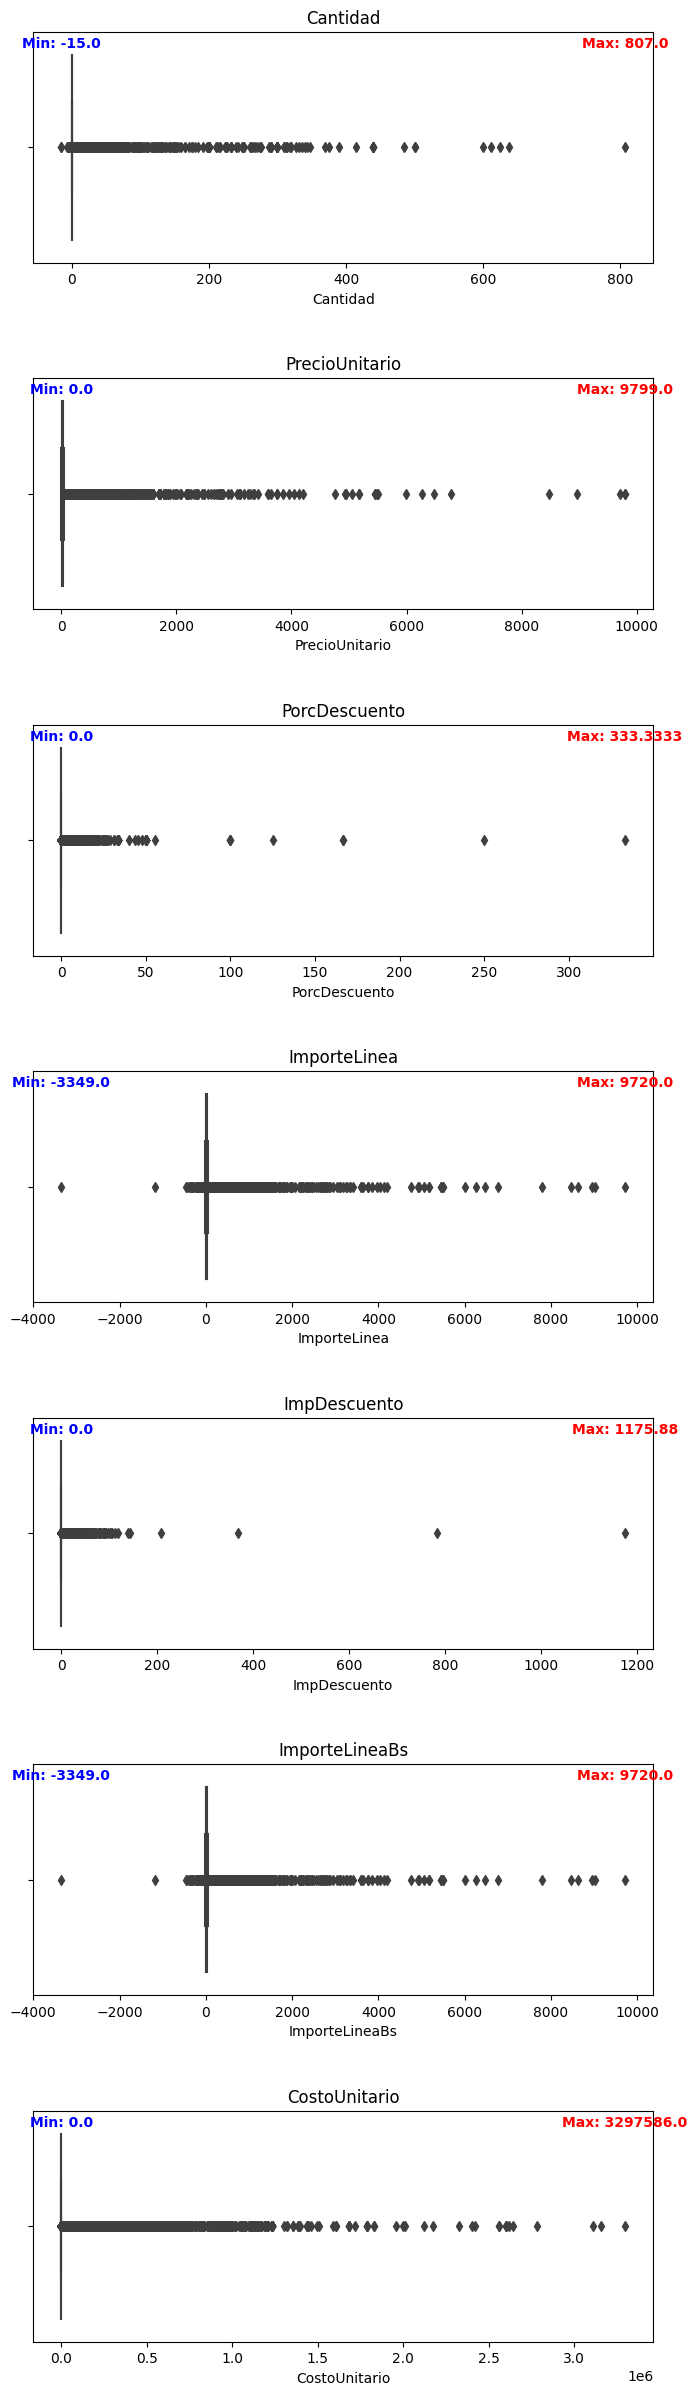

In [ ]:
numeric_cols = []
for col in data.columns:
    if data[col].dtype != object:
      numeric_cols.append(col)

fig, ax = plt.subplots(nrows=len(numeric_cols), ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(numeric_cols):
      sns.boxplot(x=col, data=data, ax=ax[i])
      ax[i].set_title(col)

      min_val = data[col].min()
      max_val = data[col].max()
      ax[i].text(x=min_val, y=0.95, s=f"Min: {min_val}", color='blue', ha='center', va='center', fontweight='bold', transform=ax[i].get_xaxis_transform())
      ax[i].text(x=max_val, y=0.95, s=f"Max: {max_val}", color='red', ha='center', va='center', fontweight='bold', transform=ax[i].get_xaxis_transform())


Observaciones
*   La cantidad no debe ser negativa
*   



In [ ]:
print('Tamaño antes de limitar cantidad mayor a 0: ',data.shape)
data = data[data['Cantidad'] > 0]
print('Tamaño después de limitar cantidad mayor a 0: ', data.shape)

Tamaño antes de limitar cantidad mayor a 0:  (2927256, 15)
Tamaño después de limitar cantidad mayor a 0:  (2925720, 15)


## Columnas que no aportan a resolver el problema

*   Se elimina la columna NombreCliente porque el código ya permite identificarlo
*   Se elimina la columna fecha pues asumimos que el sistema de recomendación lo hace en base a preferencias o items no en base a la fecha en la que se encuentra el usuario
*   Se elimina la columna unidadMedida
*  Se puede eliminar el codigosap porque el la descripcio ya indica qué producto se recomendaría de mejor manera
*  Se elimina el importe de descuento y nos quedamos solo con el porcentaje de descuento que hubo




In [ ]:
data.drop(['NombreCliente','UnidadMedida','codigosap', 'ImpDescuento'], axis = 1, inplace = True)

Se verifica las columnas importe Linea

In [ ]:
import pandas as pd

diferencias_importe = data['ImporteLinea'] != data['ImporteLineaBs']

# Comprueba si hay alguna diferencia
hay_diferencias = diferencias_importe.any()

print("¿Hay diferencias entre las columnas?:", hay_diferencias)

¿Hay diferencias entre las columnas?: False


In [ ]:
diferencias_precio_importe = data['ImporteLinea'] != data['PrecioUnitario']
# Comprueba si hay alguna diferencia
hay_diferencias = diferencias_precio_importe.any()

print("¿Hay diferencias entre las columnas?:", hay_diferencias)

¿Hay diferencias entre las columnas?: True


Se elimina también la columna ImporteLineaBs e ImporteLinea porque es lo mismo que PrecioUnitario

In [ ]:
data.drop(['ImporteLineaBs'], axis = 1, inplace = True)

## Guardar data

In [ ]:
data.loc[data['CostoUnitario'] > data['PrecioUnitario'], 'CostoUnitario'] /= 10000
data = data[data['CostoUnitario'] != 0]
data.head()

,CodCliente,Categoria,Subcategoria,descripcion,fecha,Cantidad,PrecioUnitario,PorcDescuento,ImporteLinea,CostoUnitario
0,3546436,SALUD SEXUAL,PRESERVATIVOS,PRESERVATIVO MAXMEN BOOM 3UN,2021-07-04,1.0,12.9,0.0,12.9,8.4943
1,647917,PAPELES DESECHABLES,SERVILLETAS,SERVILLETA ELITE COCTEL 400UN,2021-07-04,1.0,29.9,0.0,29.9,23.3678
2,647917,BEBIDAS LACTEAS,YOGURT NATURAL/GRIEG,YOGURT FATYH NATURAL 500 ML,2021-07-04,1.0,8.9,0.0,8.9,7.1264
3,647917,AZUCAR,AZUCAR MORENA,AZUCAR AGUAI MORENA 1 KG,2021-07-04,1.0,5.5,0.0,5.5,4.4483
4,647917,AZUCAR,AZUCAR BLANCA,AZUCAR GUABIRA EXTRA FINA 5KG,2021-07-04,1.0,25.5,0.0,25.5,18.4713


In [ ]:
ruta = "/content/drive/MyDrive/Colab Notebooks/Big Data/supermercados_clean.csv"
data.to_csv(ruta, index=False)